### Scaling

__cv2.resize(image, dsize, fx, fy, interpolation)__

`image` : 이미지

`dsize` : manual size, (가로, 세로)의 튜플로 입력

`fx` : 가로 배율

`fy` : 세로 배율

`interpolation` : 보간법, 이미지가 확대, 축소되었을때 어색한 부분을 조정해준다.

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('../Data/opencv.png')

# 행 : Height, 열:width
height, width = img.shape[:2]

# 이미지 축소
shrink = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

# Manual Size지정
zoom1 = cv2.resize(img, (width*2, height*2), interpolation=cv2.INTER_CUBIC)

# 배수 Size지정
zoom2 = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

cv2.imshow('Origianl', img)
cv2.imshow('Shrink', shrink)
cv2.imshow('Zoom1', zoom1)
cv2.imshow('Zoom2', zoom2)

cv2.waitKey(0)
cv2.destroyAllWindows()

### Translation

__cv2.warpAffine(Image, M, dsize)__

`Image` : 사용할 이미지

`M` : 변환 행렬

`dsize` : 출력 이미지 사이즈 (가로, 세로) 형태의 튜플로 입력

위치 옮기기 메소드

In [ ]:
import cv2
import numpy as np

img = cv2.imread('../Data/opencv.png')

rows, cols = img.shape[:2]

# 변환 행렬, X축으로 50, Y축으로 60 이동
M = np.float32([[1,0,50],[0,1,60]])

dst = cv2.warpAffine(img, M,(cols, rows))
cv2.imshow('Original', img)
cv2.imshow('Translation', dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

### Rotation

__cv2.getRotationMatrix2D(center, angle, scale)__

In [2]:
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('../Data/opencv.png')

rows, cols = img.shape[:2]

# 이미지의 중심점을 기준으로 90도 회전 하면서 0.5배 Scale
M= cv2.getRotationMatrix2D((cols/2, rows/2),90, 0.5)

dst = cv2.warpAffine(img, M,(cols, rows))



# cv2.imshow('Original', img)
# cv2.imshow('Rotation', dst)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

<Figure size 640x480 with 1 Axes>

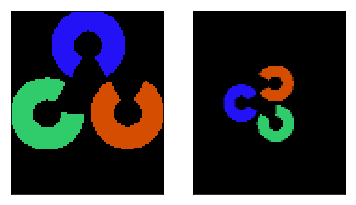

In [12]:
plt.subplot(1, 2, 1), plt.imshow(img), plt.xticks([]), plt.yticks([])
plt.subplot(1, 2, 2), plt.imshow(dst), plt.xticks([]), plt.yticks([])
plt.show()

### Affine Transformation

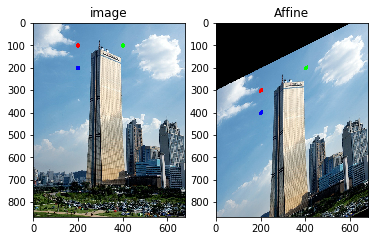

In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.merge(cv2.split(cv2.imread('../Data/63.jpg'))[::-1])

rows, cols, ch = img.shape

pts1 = np.float32([[200,100],[400,100],[200,200]])
pts2 = np.float32([[200,300],[400,200],[200,400]])

# pts1의 좌표에 표시. Affine 변환 후 이동 점 확인.
cv2.circle(img, (200,100), 10, (255,0,0),-1)
cv2.circle(img, (400,100), 10, (0,255,0),-1)
cv2.circle(img, (200,200), 10, (0,0,255),-1)

M = cv2.getAffineTransform(pts1, pts2)

dst = cv2.warpAffine(img, M, (cols,rows))

plt.subplot(121), plt.imshow(img), plt.title('image')
plt.subplot(122), plt.imshow(dst), plt.title('Affine')
plt.show()

### Perspective Transformation

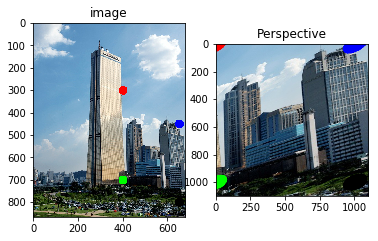

In [33]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.merge(cv2.split(cv2.imread('../Data/63.jpg'))[::-1])

# 이미지에서 확대할 좌표를 지정하는 것으로 좌상, 좌하, 우상, 우하
pts1 = np.float32([[400,300],[400,700],[650,450],[650,800]])

# 좌표의 이동점으로 img에 찍은 점이 오는 위치를 뜻한다.
pts2 = np.float32([[10,10],[10,1000],[1000,10],[1000,1000]])

# pts1의 좌표에 표시. perspective 변환 후 이동 점 확인.
cv2.circle(img, (400,300), 20, (255,0,0),-1)
cv2.circle(img, (400,700), 20, (0,255,0),-1)
cv2.circle(img, (650,450), 20, (0,0,255),-1)
cv2.circle(img, (650,800), 20, (0,0,0),-1)

M = cv2.getPerspectiveTransform(pts1, pts2)

dst = cv2.warpPerspective(img, M, (1100,1100))

plt.subplot(121),plt.imshow(img),plt.title('image')
plt.subplot(122),plt.imshow(dst),plt.title('Perspective')
plt.show()